# 📈 开源协作网络时序分析
## 核心目标：从时序数据中提取关键洞察，为DataEase可视化准备数据

本Notebook将演示：
1. 加载并探索时序协作数据
2. 分析网络结构月度演化
3. 识别关键贡献者与社区变化
4. 输出可视化友好格式的数据

## 第一步：环境准备与数据加载

In [5]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
sns.set_palette("husl")

print("✅ 环境准备完成")

✅ 环境准备完成


In [6]:
import os

project_path = r'C:\Users\31802\Desktop\OpenSaga'
os.chdir(project_path)

developers_df = pd.read_csv('data/developers.csv')


In [7]:
print("加载数据文件...")

developers_df = pd.read_csv('data/developers.csv')
collab_df = pd.read_csv('data/collaborations_temporal.csv')
monthly_df = pd.read_csv('data/monthly_metrics.csv')
latest_network_df = pd.read_csv('data/latest_network.csv')

print(f"✅ 开发者数据: {len(developers_df)} 位开发者")
print(f"✅ 协作记录: {len(collab_df)} 条时序记录")
print(f"✅ 月度指标: {len(monthly_df)} 个月份")
print(f"✅ 最新网络: {len(latest_network_df)} 条边")

print("\n开发者数据预览:")
display(developers_df.head())

print("\n协作数据预览 (含时间戳):")
collab_df['timestamp'] = pd.to_datetime(collab_df['timestamp'])
display(collab_df.head())

加载数据文件...
✅ 开发者数据: 50 位开发者
✅ 协作记录: 1119 条时序记录
✅ 月度指标: 12 个月份
✅ 最新网络: 106 条边

开发者数据预览:


,developer_id,name,primary_tech,join_date,activity_level
0,1,Dev_001,TypeScript,2025-03-10,0.608633
1,2,Dev_002,C++,2025-01-09,0.335084
2,3,Dev_003,Go,2025-02-04,0.364055
3,4,Dev_004,C++,2025-01-19,0.415662
4,5,Dev_005,Go,2025-03-24,0.689155



协作数据预览 (含时间戳):


,source,target,weight,timestamp,year_month,source_tech,target_tech
0,1,8,0.23,2025-01-27,2025-01,TypeScript,Python
1,1,8,0.32,2025-01-27,2025-01,TypeScript,Python
2,4,19,0.19,2025-01-27,2025-01,C++,JavaScript
3,4,7,0.22,2025-01-27,2025-01,C++,Rust
4,4,14,0.41,2025-01-27,2025-01,C++,Go


## 第二步：宏观趋势分析（制作第一张图表）

FileNotFoundError: [Errno 2] No such file or directory: '../data/monthly_trends.png'

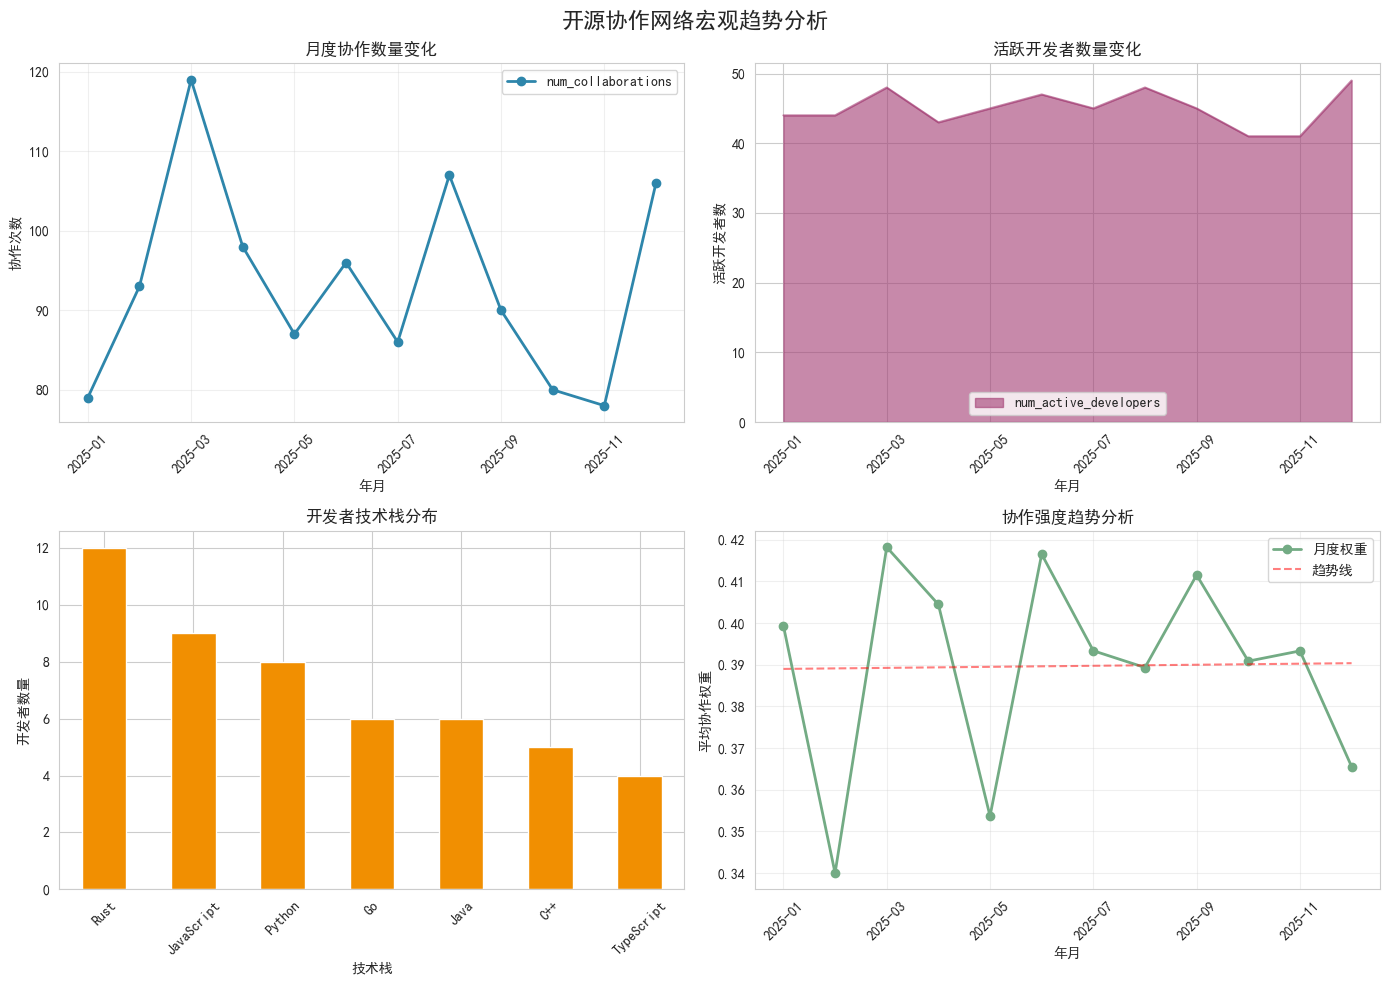

In [8]:
import matplotlib.pyplot as plt
import matplotlib

try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    use_chinese = True
except:
    use_chinese = False

# 创建第一个可视化：协作活动趋势
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('开源协作网络宏观趋势分析', fontsize=16, fontweight='bold')

# 1. 月度协作数量趋势
ax1 = axes[0, 0]
monthly_df.plot(x='year_month', y='num_collaborations', kind='line', 
                marker='o', ax=ax1, color='#2E86AB', linewidth=2)
ax1.set_title('月度协作数量变化', fontsize=12)
ax1.set_xlabel('年月')
ax1.set_ylabel('协作次数')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. 活跃开发者数量趋势
ax2 = axes[0, 1]
monthly_df.plot(x='year_month', y='num_active_developers', kind='area',
                alpha=0.6, ax=ax2, color='#A23B72')
ax2.set_title('活跃开发者数量变化', fontsize=12)
ax2.set_xlabel('年月')
ax2.set_ylabel('活跃开发者数')
ax2.tick_params(axis='x', rotation=45)

# 3. 技术栈分布
ax3 = axes[1, 0]
tech_dist = developers_df['primary_tech'].value_counts()
tech_dist.plot(kind='bar', ax=ax3, color='#F18F01')
ax3.set_title('开发者技术栈分布', fontsize=12)
ax3.set_xlabel('技术栈')
ax3.set_ylabel('开发者数量')
ax3.tick_params(axis='x', rotation=45)

# 4. 协作权重分布
ax4 = axes[1, 1]

monthly_df.plot(x='year_month', y='avg_collab_weight', 
                kind='line', marker='o', ax=ax4, 
                color='#73AB84', linewidth=2)

z = np.polyfit(range(len(monthly_df)), monthly_df['avg_collab_weight'], 1)
p = np.poly1d(z)
ax4.plot(monthly_df['year_month'], p(range(len(monthly_df))), 
         'r--', alpha=0.5, label='趋势线')

if use_chinese:
    ax4.set_title('协作强度趋势分析', fontsize=12)
    ax4.set_xlabel('年月')
    ax4.set_ylabel('平均协作权重')
    ax4.legend(['月度权重', '趋势线'])
else:
    ax4.set_title('Collaboration Weight Trend', fontsize=12)
    ax4.set_xlabel('Year-Month')
    ax4.set_ylabel('Average Weight')
    ax4.legend(['Monthly Weight', 'Trend Line'])

ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 已生成宏观趋势分析图表，保存为 data/monthly_trends.png")

## 第三步：网络结构分析

In [9]:
!pip install easygraph -q
print("EasyGraph安装完成")

EasyGraph安装完成



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
print("检查并安装必要的依赖...")

required_packages = ['scipy', 'python-louvain']
missing_packages = []

for package in required_packages:
    try:
        if package == 'scipy':
            import scipy
            print(f"✅ {package}: {scipy.__version__}")
        elif package == 'python-louvain':
            import community
            print(f"✅ {package}: 已安装")
    except ImportError:
        missing_packages.append(package)

if missing_packages:
    print(f"缺少包: {missing_packages}")
    import subprocess
    for package in missing_packages:
        print(f"正在安装 {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
        print(f"✅ {package} 安装完成")

print("\n计算PageRank...")
try:
    pagerank = nx.pagerank(G, alpha=0.85)
    print("✅ PageRank计算成功")
except Exception as e:
    print(f"⚠️ NetworkX PageRank失败: {e}")
    print("使用备用算法...")
    pagerank = simple_pagerank(G, alpha=0.85)
    print("✅ 备用PageRank计算成功")

检查并安装必要的依赖...
✅ scipy: 1.16.3
✅ python-louvain: 已安装

计算PageRank...
✅ PageRank计算成功


In [12]:
import networkx as nx

print("\n构建协作网络...")
G = nx.DiGraph()

for _, dev in developers_df.iterrows():
    G.add_node(dev['developer_id'], 
               name=dev['name'],
               tech=dev['primary_tech'],
               activity=dev['activity_level'])
print(f"✅ 添加了 {G.number_of_nodes()} 个节点")

edge_count = 0
for _, edge in latest_network_df.iterrows():
    if edge['source'] in G and edge['target'] in G:
        G.add_edge(edge['source'], edge['target'], weight=edge['weight'])
        edge_count += 1
print(f"✅ 添加了 {edge_count} 条边")

print(f"\n📊 网络统计:")
print(f"   节点数: {G.number_of_nodes()}")
print(f"   边数: {G.number_of_edges()}")

print("\n计算PageRank...")
pagerank = nx.pagerank(G, alpha=0.85)

degree_centrality = nx.degree_centrality(G)

top_developers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:8]
print("\n🏆 关键贡献者排名 (PageRank):")
print("-" * 60)
for i, (dev_id, score) in enumerate(top_developers, 1):
    dev_info = developers_df[developers_df['developer_id'] == dev_id].iloc[0]
    degree = degree_centrality.get(dev_id, 0)
    print(f"{i:2d}. {dev_info['name']:10} ({dev_info['primary_tech']:12})")
    print(f"      PageRank: {score:.4f} | 度中心性: {degree:.3f}")

try:
    import community as community_louvain
    # 转换为无向图进行社区检测
    G_undir = G.to_undirected()
    partition = community_louvain.best_partition(G_undir)
    
    # 统计社区
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)
    
    print(f"\n🔍 社区检测结果: {len(communities)} 个社区")
    for comm_id, nodes in communities.items():
        print(f"   社区{comm_id}: {len(nodes)} 个成员")
        
except ImportError:
    print("\n⚠️ 未安装python-louvain，跳过社区检测")
    print("   安装命令: pip install python-louvain")

使用NetworkX版本: 3.6.1

构建协作网络...
✅ 添加了 50 个节点
✅ 添加了 106 条边

📊 网络统计:
   节点数: 50
   边数: 83

计算PageRank...

🏆 关键贡献者排名 (PageRank):
------------------------------------------------------------
 1. Dev_011    (JavaScript  )
      PageRank: 0.0573 | 度中心性: 0.122
 2. Dev_017    (Java        )
      PageRank: 0.0488 | 度中心性: 0.102
 3. Dev_015    (Java        )
      PageRank: 0.0475 | 度中心性: 0.102
 4. Dev_028    (Java        )
      PageRank: 0.0422 | 度中心性: 0.102
 5. Dev_024    (Java        )
      PageRank: 0.0382 | 度中心性: 0.102
 6. Dev_022    (Rust        )
      PageRank: 0.0359 | 度中心性: 0.082
 7. Dev_021    (Python      )
      PageRank: 0.0335 | 度中心性: 0.122
 8. Dev_030    (Rust        )
      PageRank: 0.0333 | 度中心性: 0.041

🔍 社区检测结果: 7 个社区
   社区0: 1 个成员
   社区1: 12 个成员
   社区2: 8 个成员
   社区3: 11 个成员
   社区6: 6 个成员
   社区4: 5 个成员
   社区5: 7 个成员


In [14]:
print("\n构建最新月份协作网络...")

import networkx as nx

# 直接使用NetworkX创建图
G = nx.DiGraph()

# 添加节点（开发者）
for _, dev in developers_df.iterrows():
    G.add_node(dev['developer_id'], 
               name=dev['name'], 
               tech=dev['primary_tech'], 
               activity=dev['activity_level'])

# 添加边（协作关系）
for _, edge in latest_network_df.iterrows():
    G.add_edge(edge['source'], edge['target'], weight=edge['weight'])

print(f"网络构建完成: {G.number_of_nodes()} 个节点, {G.number_of_edges()} 条边")

# 计算网络指标
print("\n计算网络关键指标...")

# 使用NetworkX的函数
pagerank = nx.pagerank(G, alpha=0.85)
degree_centrality = nx.degree_centrality(G)

# 找出最重要的5个开发者
top_developers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("🏆 关键贡献者排名 (PageRank):")
for i, (dev_id, score) in enumerate(top_developers, 1):
    dev_info = developers_df[developers_df['developer_id'] == dev_id].iloc[0]
    print(f"   第{i}名: {dev_info['name']} "
          f"({dev_info['primary_tech']}), 得分: {score:.4f}")


构建最新月份协作网络...
网络构建完成: 50 个节点, 83 条边

计算网络关键指标...
🏆 关键贡献者排名 (PageRank):
   第1名: Dev_011 (JavaScript), 得分: 0.0573
   第2名: Dev_017 (Java), 得分: 0.0488
   第3名: Dev_015 (Java), 得分: 0.0475
   第4名: Dev_028 (Java), 得分: 0.0422
   第5名: Dev_024 (Java), 得分: 0.0382


## 第四步：社区演化分析（核心洞察）

In [15]:
import os

project_path = r'C:\Users\31802\Desktop\OpenSaga'
os.chdir(project_path)

developers_df = pd.read_csv('data/developers.csv')

In [16]:
print("加载数据文件...")

import pandas as pd

developers_df = pd.read_csv('data/developers.csv')
collab_df = pd.read_csv('data/collaborations_temporal.csv')
monthly_df = pd.read_csv('data/monthly_metrics.csv')
latest_network_df = pd.read_csv('data/latest_network.csv')

# 确保时间戳格式
collab_df['timestamp'] = pd.to_datetime(collab_df['timestamp'])

print(f"✅ 开发者数据: {len(developers_df)} 位开发者")
print(f"✅ 协作记录: {len(collab_df)} 条时序记录")
print(f"✅ 月度指标: {len(monthly_df)} 个月份")
print(f"✅ 最新网络: {len(latest_network_df)} 条边")

加载数据文件...
✅ 开发者数据: 50 位开发者
✅ 协作记录: 1119 条时序记录
✅ 月度指标: 12 个月份
✅ 最新网络: 106 条边


In [17]:
print("分析月度社区结构演化...")

try:
    import community as community_louvain
    use_louvain = True
    print("✅ 使用Louvain算法进行社区检测")
except ImportError:
    use_louvain = False
    print("⚠️ 未安装python-louvain，使用连通组件作为社区")
    print("   安装命令: pip install python-louvain")

import networkx as nx
community_evolution = []
monthly_summary = []

# 按月份分组（按时间排序）
monthly_groups = sorted(collab_df.groupby('year_month'), key=lambda x: x[0])

for month_idx, (month, month_data) in enumerate(monthly_groups):
    print(f"  {month}: ", end="")
    
    # 创建该月的网络
    G_month = nx.DiGraph()
    
    # 添加该月活跃的开发者
    active_devs = set(month_data['source']).union(set(month_data['target']))
    for dev_id in active_devs:
        dev_info = developers_df[developers_df['developer_id'] == dev_id]
        if not dev_info.empty:
            G_month.add_node(dev_id, 
                           name=dev_info.iloc[0]['name'],
                           tech=dev_info.iloc[0]['primary_tech'])
    
    # 添加该月的协作关系
    for _, edge in month_data.iterrows():
        G_month.add_edge(edge['source'], edge['target'], weight=edge['weight'])
    
    num_active = len(active_devs)
    num_edges = G_month.number_of_edges()
    
    # 检测社区
    if num_edges > 0:
        if use_louvain:
            # 使用Louvain算法
            G_undir = G_month.to_undirected()
            partition = community_louvain.best_partition(G_undir)
            
            # 重组社区结构
            communities_dict = {}
            for node, comm_id in partition.items():
                communities_dict.setdefault(comm_id, []).append(node)
            communities = list(communities_dict.values())
            num_communities = len(communities)
            
        else:
            # 使用连通组件
            G_undir = G_month.to_undirected()
            components = list(nx.connected_components(G_undir))
            communities = components
            num_communities = len(components)
            partition = {}
            for comm_id, nodes in enumerate(components):
                for node in nodes:
                    partition[node] = comm_id
        
        # 记录社区信息
        for comm_id, comm_nodes in enumerate(communities):
            for node in comm_nodes:
                community_evolution.append({
                    'year_month': month,
                    'month_index': month_idx,
                    'developer_id': node,
                    'community_id': comm_id,
                    'community_size': len(comm_nodes)
                })
        
        # 记录月度汇总
        avg_community_size = sum(len(c) for c in communities) / len(communities) if communities else 0
        
        monthly_summary.append({
            'year_month': month,
            'month_index': month_idx,
            'num_active_developers': num_active,
            'num_collaborations': len(month_data),
            'num_edges': num_edges,
            'num_communities': num_communities,
            'avg_community_size': round(avg_community_size, 1),
            'network_density': nx.density(G_month) if num_active > 1 else 0
        })
        
        print(f"{num_active}活跃开发者, {num_edges}条边, {num_communities}个社区")
    else:
        print(f"{num_active}活跃开发者, 0条边, 0个社区")

# 处理结果
if community_evolution:
    community_evolution_df = pd.DataFrame(community_evolution)
    monthly_summary_df = pd.DataFrame(monthly_summary)
    
    print(f"\n✅ 社区演化分析完成:")
    print(f"   • 覆盖 {len(monthly_summary_df)} 个月份")
    print(f"   • 总记录数: {len(community_evolution_df)} 条")
    print(f"   • 平均每月社区数: {monthly_summary_df['num_communities'].mean():.1f}")
    
    # 保存数据
    community_evolution_df.to_csv('data/community_evolution_detail.csv', index=False, encoding='utf-8')
    monthly_summary_df.to_csv('data/community_evolution_monthly.csv', index=False, encoding='utf-8')
    
    print(f"\n✅ 数据已保存:")
    print(f"   • data/community_evolution_detail.csv")
    print(f"   • data/community_evolution_monthly.csv")
    
    # 显示演化趋势
    print("\n📈 社区演化趋势摘要:")
    print(monthly_summary_df[['year_month', 'num_communities', 'avg_community_size', 'num_active_developers']].to_string(index=False))
    
else:
    print("❌ 未生成有效的社区演化数据")

分析月度社区结构演化...
✅ 使用Louvain算法进行社区检测
  2025-01: 44活跃开发者, 64条边, 7个社区
  2025-02: 44活跃开发者, 72条边, 8个社区
  2025-03: 48活跃开发者, 93条边, 9个社区
  2025-04: 43活跃开发者, 76条边, 7个社区
  2025-05: 45活跃开发者, 67条边, 8个社区
  2025-06: 47活跃开发者, 74条边, 7个社区
  2025-07: 45活跃开发者, 64条边, 8个社区
  2025-08: 48活跃开发者, 85条边, 8个社区
  2025-09: 45活跃开发者, 68条边, 6个社区
  2025-10: 41活跃开发者, 61条边, 6个社区
  2025-11: 41活跃开发者, 58条边, 7个社区
  2025-12: 49活跃开发者, 83条边, 6个社区

✅ 社区演化分析完成:
   • 覆盖 12 个月份
   • 总记录数: 540 条
   • 平均每月社区数: 7.2

✅ 数据已保存:
   • data/community_evolution_detail.csv
   • data/community_evolution_monthly.csv

📈 社区演化趋势摘要:
year_month  num_communities  avg_community_size  num_active_developers
   2025-01                7                 6.3                     44
   2025-02                8                 5.5                     44
   2025-03                9                 5.3                     48
   2025-04                7                 6.1                     43
   2025-05                8                 5.6                     45

加载社区演化数据...
加载完成: 540 条记录
数据列: ['year_month', 'month_index', 'developer_id', 'community_id', 'community_size']

数据预览:
  year_month  month_index  developer_id  community_id  community_size
0    2025-01            0             1             0               6
1    2025-01            0             8             0               6
2    2025-01            0            12             0               6
3    2025-01            0            26             0               6
4    2025-01            0            31             0               6


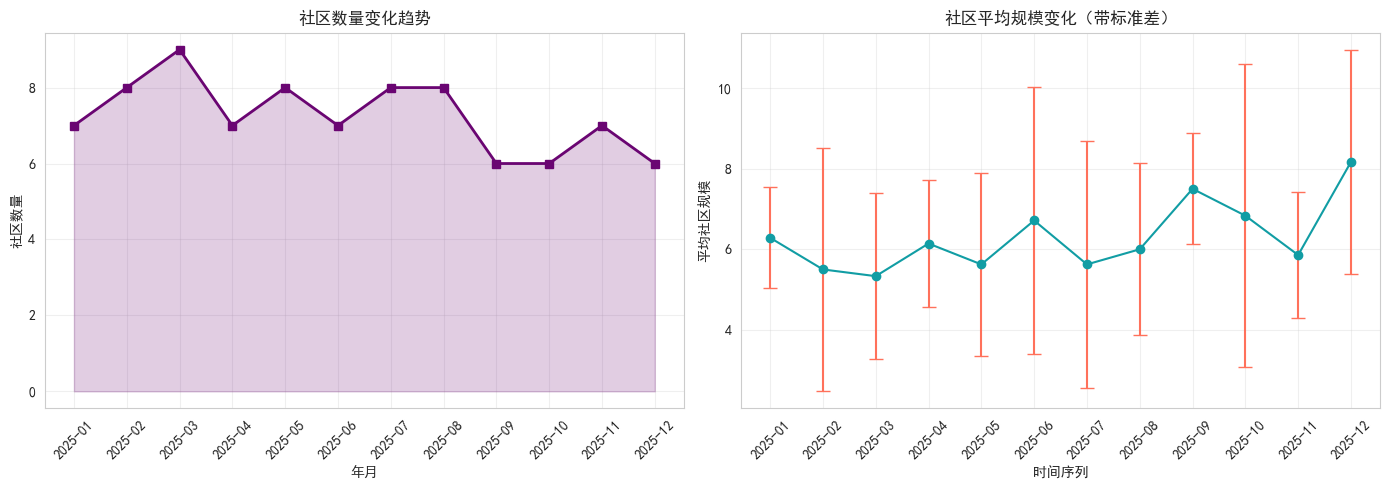

✅ 已生成社区演化分析图表，保存为 data/community_evolution.png

📊 社区演化统计摘要:

月度社区数量统计:
year_month  num_communities
   2025-01                7
   2025-02                8
   2025-03                9
   2025-04                7
   2025-05                8
   2025-06                7
   2025-07                8
   2025-08                8
   2025-09                6
   2025-10                6
   2025-11                7
   2025-12                6

👥 总参与开发者数: 50
🏃 平均每个开发者在 5.4 个不同社区中工作过
📊 社区移动分布:
    • 在1个社区: 1 名开发者
    • 在2-3个社区: 5 名开发者
    • 在3个以上社区: 44 名开发者


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

# 加载社区演化数据
print("加载社区演化数据...")
community_df = pd.read_csv('data/community_evolution_detail.csv')
print(f"加载完成: {len(community_df)} 条记录")
print("数据列:", community_df.columns.tolist())

# 显示数据预览
print("\n数据预览:")
print(community_df.head())

# 可视化社区演化
# 准备桑基图数据（展示开发者社区间流动）

# 1. 社区数量变化
comm_counts = community_df.groupby('year_month')['community_id'].nunique().reset_index()
comm_counts.columns = ['year_month', 'num_communities']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 社区数量趋势
ax1.plot(comm_counts['year_month'], comm_counts['num_communities'], 
         marker='s', color='#6A0572', linewidth=2)
ax1.fill_between(comm_counts['year_month'], comm_counts['num_communities'], 
                 alpha=0.2, color='#6A0572')
ax1.set_title('社区数量变化趋势', fontsize=12)
ax1.set_xlabel('年月')
ax1.set_ylabel('社区数量')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 社区规模分布（箱型图）
if 'community_size' in community_df.columns:
    comm_sizes = community_df.groupby(['year_month', 'community_id'])['community_size'].first()
else:
    community_df['community_size'] = community_df.groupby(['year_month', 'community_id'])['developer_id'].transform('count')
    comm_sizes = community_df.groupby(['year_month', 'community_id'])['community_size'].first()

monthly_size_stats = comm_sizes.groupby('year_month').agg(['mean', 'std']).reset_index()

ax2.errorbar(range(len(monthly_size_stats)), 
             monthly_size_stats['mean'], 
             yerr=monthly_size_stats['std'],
             fmt='o-', color='#119DA4', 
             ecolor='#FF715B', capsize=5)
ax2.set_title('社区平均规模变化（带标准差）', fontsize=12)
ax2.set_xlabel('时间序列')
ax2.set_ylabel('平均社区规模')
ax2.set_xticks(range(len(monthly_size_stats)))
ax2.set_xticklabels(monthly_size_stats['year_month'], rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/community_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 已生成社区演化分析图表，保存为 data/community_evolution.png")

# 添加一些统计分析
print("\n📊 社区演化统计摘要:")
print("=" * 40)

# 月度社区数量统计
print("\n月度社区数量统计:")
print(comm_counts.to_string(index=False))

# 开发者流动性分析（如果数据包含开发者ID）
if 'developer_id' in community_df.columns:
    print(f"\n👥 总参与开发者数: {community_df['developer_id'].nunique()}")
    
    # 计算开发者在不同社区的移动情况
    developer_moves = community_df.groupby('developer_id')['community_id'].nunique()
    print(f"🏃 平均每个开发者在 {developer_moves.mean():.1f} 个不同社区中工作过")
    print(f"📊 社区移动分布:")
    print(f"    • 在1个社区: {(developer_moves == 1).sum()} 名开发者")
    print(f"    • 在2-3个社区: {((developer_moves >= 2) & (developer_moves <= 3)).sum()} 名开发者")
    print(f"    • 在3个以上社区: {(developer_moves > 3).sum()} 名开发者")

## 第五步：为DataEase准备优化数据

In [19]:
import pandas as pd
import networkx as nx

print("加载数据文件...")
developers_df = pd.read_csv('data/developers.csv')
latest_network_df = pd.read_csv('data/latest_network.csv')
monthly_df = pd.read_csv('data/monthly_metrics.csv')
community_df = pd.read_csv('data/community_evolution_detail.csv')

print(f" 开发者数据: {len(developers_df)} 位开发者")
print(f" 最新网络边数据: {len(latest_network_df)} 条边")
print(f" 月度指标: {len(monthly_df)} 个月份")
print(f" 社区数据: {len(community_df)} 条记录")

# 创建网络图并计算中心性指标
print("\n计算网络中心性指标...")
G = nx.Graph()

# 添加节点
for _, row in developers_df.iterrows():
    G.add_node(row['developer_id'], 
               name=row['name'],
               primary_tech=row.get('primary_tech', 'Unknown'),
               join_date=row.get('join_date', ''))

# 添加边
for _, row in latest_network_df.iterrows():
    G.add_edge(row['source'], row['target'], 
               weight=row['weight'])

# 计算PageRank
print("计算PageRank...")
pagerank = nx.pagerank(G)

# 计算度中心性
print("计算度中心性...")
degree_centrality = nx.degree_centrality(G)

# 计算介数中心性
print("计算介数中心性...")
betweenness_centrality = nx.betweenness_centrality(G)

print("✅ 网络分析完成!")
print(f"  节点数: {G.number_of_nodes()}")
print(f"  边数: {G.number_of_edges()}")
print(f"  最大PageRank分数: {max(pagerank.values()):.4f}")
print(f"  最大度中心性: {max(degree_centrality.values()):.4f}")

print("\n为DataEase可视化准备优化格式的数据...")

# 1. 节点数据（开发者信息 + 所有中心性分数）
node_data = developers_df.copy()

# 添加PageRank分数
pagerank_df = pd.DataFrame(list(pagerank.items()), 
                           columns=['developer_id', 'pagerank_score'])
node_data = pd.merge(node_data, pagerank_df, on='developer_id', how='left')

# 添加度中心性
degree_df = pd.DataFrame(list(degree_centrality.items()), 
                         columns=['developer_id', 'degree_centrality'])
node_data = pd.merge(node_data, degree_df, on='developer_id', how='left')

# 添加介数中心性
betweenness_df = pd.DataFrame(list(betweenness_centrality.items()), 
                              columns=['developer_id', 'betweenness_centrality'])
node_data = pd.merge(node_data, betweenness_df, on='developer_id', how='left')

# 添加度（直接连接数）
degree_dict = dict(G.degree())
degree_count_df = pd.DataFrame(list(degree_dict.items()), 
                               columns=['developer_id', 'degree'])
node_data = pd.merge(node_data, degree_count_df, on='developer_id', how='left')

# 计算中心性百分位
for col in ['pagerank_score', 'degree_centrality', 'betweenness_centrality']:
    node_data[f'{col}_percentile'] = node_data[col].rank(pct=True) * 100

# 标记核心开发者（PageRank前20%）
pagerank_threshold = node_data['pagerank_score'].quantile(0.8)
node_data['is_core_developer'] = node_data['pagerank_score'] >= pagerank_threshold

# 保存节点数据
node_data.to_csv('data/for_viz_nodes.csv', index=False)
print(f"✅ 节点数据: data/for_viz_nodes.csv ({len(node_data)}行)")
print("  列名:", node_data.columns.tolist())

# 2. 边数据（协作关系）
edge_data = latest_network_df.copy()

# 添加技术栈信息（如果存在primary_tech列）
if 'primary_tech' in developers_df.columns:
    # 源节点技术栈
    edge_data = pd.merge(edge_data, 
                         developers_df[['developer_id', 'primary_tech']], 
                         left_on='source', right_on='developer_id', 
                         how='left')
    edge_data = edge_data.rename(columns={'primary_tech': 'source_tech'})
    edge_data = edge_data.drop(columns=['developer_id'])
    
    # 目标节点技术栈
    edge_data = pd.merge(edge_data, 
                         developers_df[['developer_id', 'primary_tech']], 
                         left_on='target', right_on='developer_id', 
                         how='left')
    edge_data = edge_data.rename(columns={'primary_tech': 'target_tech'})
    edge_data = edge_data.drop(columns=['developer_id'])
    
    # 标记技术栈是否匹配
    edge_data['tech_match'] = edge_data['source_tech'] == edge_data['target_tech']
    edge_data['tech_match_type'] = edge_data.apply(
        lambda x: 'Same Tech' if x['source_tech'] == x['target_tech'] else 'Cross-Tech', 
        axis=1
    )
else:
    edge_data['tech_match'] = False
    edge_data['tech_match_type'] = 'Unknown'

# 添加协作强度分类
edge_data['strength_level'] = pd.qcut(edge_data['weight'], q=3, 
                                       labels=['Low', 'Medium', 'High'])

# 保存边数据
edge_data.to_csv('data/for_viz_edges.csv', index=False)
print(f"✅ 边数据: data/for_viz_edges.csv ({len(edge_data)}行)")

# 3. 时序指标数据（已准备好）
monthly_df.to_csv('data/for_viz_trends.csv', index=False)
print(f"✅ 趋势数据: data/for_viz_trends.csv ({len(monthly_df)}行)")

# 4. 社区演化数据
community_df.to_csv('data/for_viz_communities.csv', index=False)
print(f"✅ 社区数据: data/for_viz_communities.csv ({len(community_df)}行)")

# 5. 新增：社区月度汇总数据
community_monthly = pd.read_csv('data/community_evolution_monthly.csv')
community_monthly.to_csv('data/for_viz_community_monthly.csv', index=False)
print(f"✅ 社区月度汇总: data/for_viz_community_monthly.csv ({len(community_monthly)}行)")

# 6. 新增：核心开发者统计
core_developers = node_data[node_data['is_core_developer']]
core_developers_summary = core_developers[[
    'developer_id', 'name', 'primary_tech', 'join_date',
    'pagerank_score', 'degree_centrality', 'betweenness_centrality'
]].sort_values('pagerank_score', ascending=False)

core_developers_summary.to_csv('data/for_viz_core_developers.csv', index=False)
print(f"✅ 核心开发者: data/for_viz_core_developers.csv ({len(core_developers_summary)}行)")

# 显示核心开发者
print("\n📊 核心开发者排行榜 (PageRank Top 10):")
print("=" * 80)
top_10 = core_developers_summary.head(10)
for idx, row in top_10.iterrows():
    print(f"{row['name']} (ID: {row['developer_id']})")
    print(f"  Tech: {row.get('primary_tech', 'Unknown')}")
    print(f"  PageRank: {row['pagerank_score']:.4f} | 度中心性: {row['degree_centrality']:.4f}")
    print(f"  介数中心性: {row['betweenness_centrality']:.4f}")
    print("-" * 40)

# 数据统计摘要
print("\n📈 数据统计摘要:")
print("=" * 80)
print(f"总开发者数: {len(node_data)}")
print(f"核心开发者数: {len(core_developers)} ({len(core_developers)/len(node_data)*100:.1f}%)")
print(f"协作边数: {len(edge_data)}")
print(f"平均协作强度: {edge_data['weight'].mean():.2f}")
print(f"跨技术协作比例: {(edge_data['tech_match_type'] == 'Cross-Tech').sum()/len(edge_data)*100:.1f}%")

加载数据文件...
 开发者数据: 50 位开发者
 最新网络边数据: 106 条边
 月度指标: 12 个月份
 社区数据: 540 条记录

计算网络中心性指标...
计算PageRank...
计算度中心性...
计算介数中心性...
✅ 网络分析完成!
  节点数: 50
  边数: 81
  最大PageRank分数: 0.0457
  最大度中心性: 0.1224

为DataEase可视化准备优化格式的数据...
✅ 节点数据: data/for_viz_nodes.csv (50行)
  列名: ['developer_id', 'name', 'primary_tech', 'join_date', 'activity_level', 'pagerank_score', 'degree_centrality', 'betweenness_centrality', 'degree', 'pagerank_score_percentile', 'degree_centrality_percentile', 'betweenness_centrality_percentile', 'is_core_developer']
✅ 边数据: data/for_viz_edges.csv (106行)
✅ 趋势数据: data/for_viz_trends.csv (12行)
✅ 社区数据: data/for_viz_communities.csv (540行)
✅ 社区月度汇总: data/for_viz_community_monthly.csv (12行)
✅ 核心开发者: data/for_viz_core_developers.csv (10行)

🎉 数据准备完成！现在可以导入DataEase进行可视化。

📊 核心开发者排行榜 (PageRank Top 10):
Dev_028 (ID: 28)
  Tech: Java
  PageRank: 0.0457 | 度中心性: 0.1020
  介数中心性: 0.1452
----------------------------------------
Dev_021 (ID: 21)
  Tech: Python
  PageRank: 0.0369 | 度中心性: 0.1224
  介数中心性:

## **接下来使用DataEase创建交互式仪表盘**